 ### Источник датасета
https://www.kaggle.com/snap/amazon-fine-food-reviews


### Описание датасета 
Датасет состоит из обзоров продуктов питания от Amazon. Данные охватывают период более 10 лет, включая все \~ 500 000 обзоров до октября 2012 года. Обзоры включают в себя информацию о продуктах и пользователях, рейтинги и комментарии к товарам. Датасет также включает в себя отзывы о всех других категорий Amazon.

### Данные включают
- Отзывы с октября 1999 до октября 2012
- 568,454 отзывов
- 256,059 пользователи
- 74,258 товаров
- 260 пользователей с 50 отзывами и более
   

### Данные колонок 
- Id - уникальный идентификатор
- ProductId - уникальный идентификатор каждого продукта
- UserId - уникальный идентификатор каждого пользователя
- ProfileName - логин профиля
- HelpfulnessNumerator - количество пользователей, которые посчитали этот отзыв полезным
- HelpfulnessDenominator - количество пользователей, которые отреагировали на этот отзыв
- Score - рейтинг от 1 до 5 (1 - худшее, 5 - лучшее)
- Time -  временная отметка
- Summary - основные выводы отзыва
- Text - весь текст отзыва


### Загружаем библиотеки

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
import string

data_folder = "Reviews.csv"

## Смотрим на данные

In [2]:
df = pd.read_csv(data_folder)
df.head(5)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


## Статистика по датасету, информация по колонкам

In [3]:
df.shape

(568454, 10)

In [4]:
df.describe()

,Id,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time
count,568454.000000,568454.000000,568454.00000,568454.000000,5.684540e+05
mean,284227.500000,1.743817,2.22881,4.183199,1.296257e+09
std,164098.679298,7.636513,8.28974,1.310436,4.804331e+07
min,1.000000,0.000000,0.00000,1.000000,9.393408e+08
25%,142114.250000,0.000000,0.00000,4.000000,1.271290e+09
50%,284227.500000,0.000000,1.00000,5.000000,1.311120e+09
75%,426340.750000,2.000000,2.00000,5.000000,1.332720e+09
max,568454.000000,866.000000,923.00000,5.000000,1.351210e+09


## Частотное распределение оценок товаров

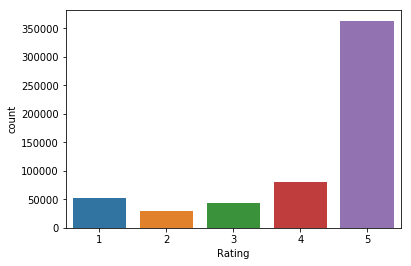

In [5]:
sns.countplot(x='Score', data=df)
plt.xlabel('Rating')
plt.show()

## Анализ положительных и негативных оценок

In [6]:
new_DF = df[['UserId','HelpfulnessNumerator','HelpfulnessDenominator', 'Summary', 'Text','Score']].copy()

new_DF["Sentiment"] = new_DF["Score"].apply(lambda score: "positive" if score > 3 else \
                                              ("negative" if score < 3 else "not defined"))

new_DF.loc[new_DF.HelpfulnessDenominator == 0, 'Usefulness'] = ["useless"]
new_DF.shape

(568454, 8)

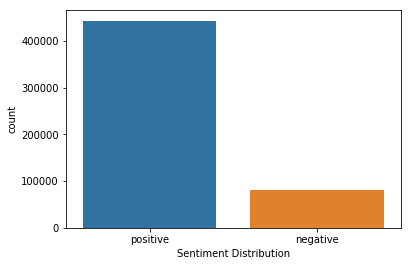

In [7]:
sns.countplot(x='Sentiment', order=["positive", "negative"], data=new_DF)
plt.xlabel('Sentiment Distribution')
plt.show()

In [8]:
new_DF.Sentiment.value_counts()

positive       443777
negative        82037
not defined     42640
Name: Sentiment, dtype: int64

## Посмотрим самые часто употребляемые слова в положительных и отрицательных отзывах

In [9]:
pos = new_DF.loc[new_DF['Sentiment'] == 'positive']
pos = pos[0:25000]

neg = new_DF.loc[new_DF['Sentiment'] == 'negative']
neg = neg[0:25000]

In [60]:
def create_Word_Corpus(temp):
    words_corpus = ''
    for val in temp["Summary"]:
        text = str(val).lower()
        tokens = nltk.word_tokenize(text)
        tokens = [word for word in tokens if word not in stopwords.words('english')]
        for words in tokens:
            words_corpus = words_corpus + words + ' '
    return words_corpus
        
pos_wordcloud = WordCloud(width=900, height=500).generate(create_Word_Corpus(pos))
neg_wordcloud = WordCloud(width=900, height=500).generate(create_Word_Corpus(neg))

In [61]:
def plot_Cloud(wordCloud):
    plt.figure( figsize=(20,10), facecolor='white')
    plt.imshow(wordCloud)
    plt.axis("off")
    plt.tight_layout(pad=0)
    plt.show()

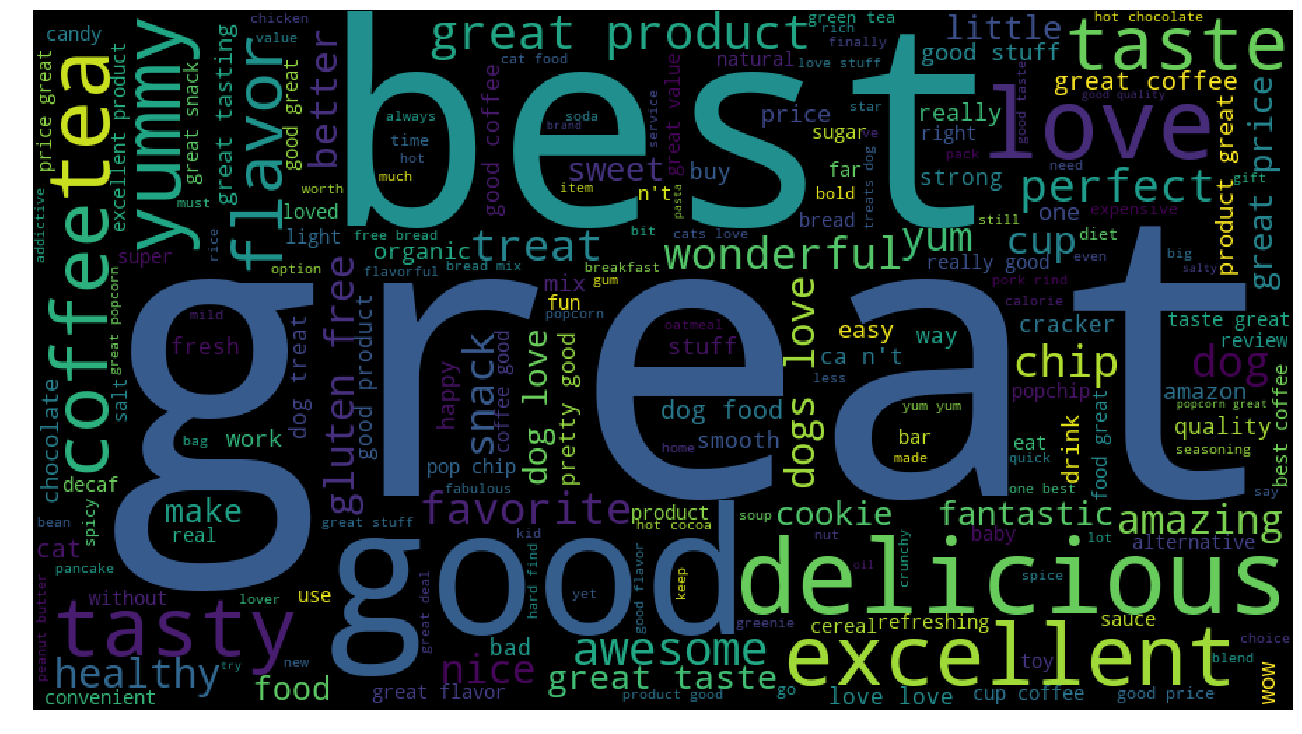

In [62]:
plot_Cloud(pos_wordcloud)

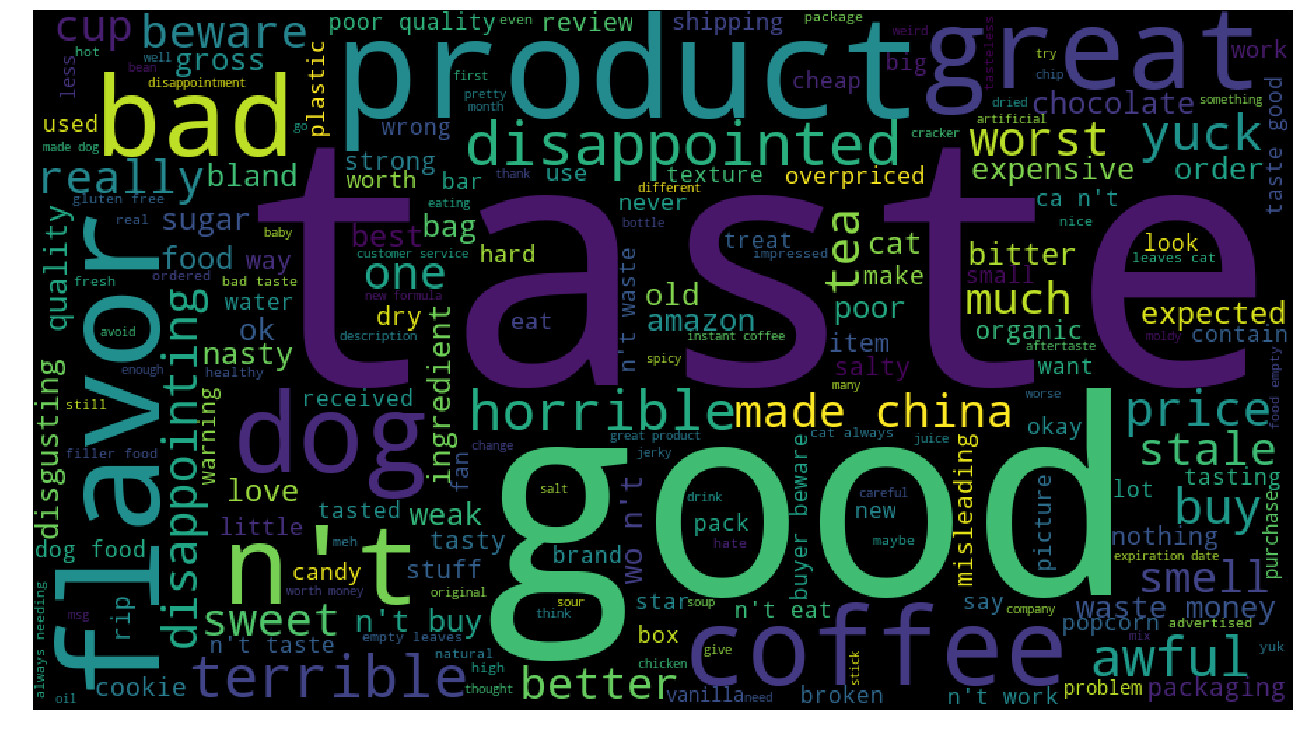

In [63]:
plot_Cloud(neg_wordcloud)

## Анализ полезных и бесполезных отзывов

In [64]:
new_DF["Usefulness"] = (new_DF["HelpfulnessNumerator"]/new_DF["HelpfulnessDenominator"]).apply\
(lambda n: ">75%" if n > 0.75 else ("<25%" if n < 0.25 else ("25-75%" if n >= 0.25 and\
                                                                        n <= 0.75 else "useless")))

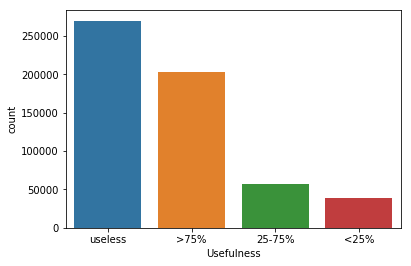

In [65]:
sns.countplot(x='Usefulness', order=['useless', '>75%', '25-75%', '<25%'], data=new_DF)
plt.xlabel('Usefulness')
plt.show()

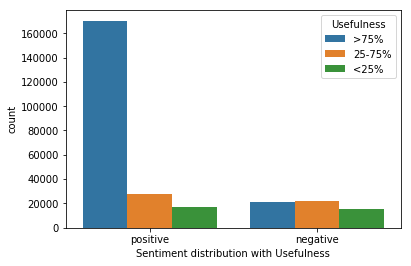

In [66]:
sns.countplot(x='Sentiment', hue='Usefulness', order=["positive", "negative"], \
              hue_order=['>75%', '25-75%', '<25%'], data=new_DF)
plt.xlabel('Sentiment distribution with Usefulness')
plt.show()

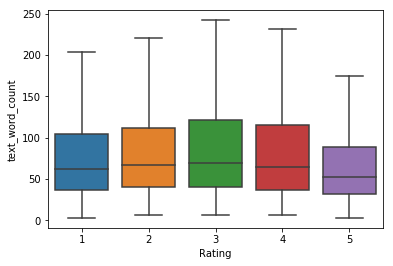

In [67]:
new_DF["text_word_count"] = new_DF["Text"].apply(lambda text: len(text.split()))
sns.boxplot(x='Score',y='text_word_count', data=new_DF, showfliers=False)
plt.xlabel('Rating')
plt.show()

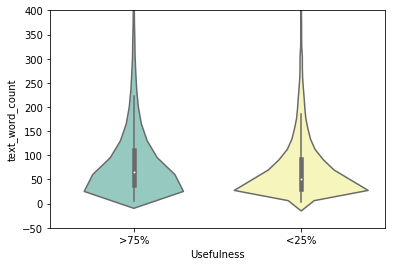

In [68]:
sns.violinplot(x='Usefulness', y='text_word_count', order=[">75%", "<25%"], \
               data=new_DF, palette='Set3')
plt.ylim(-50, 400)
plt.show()

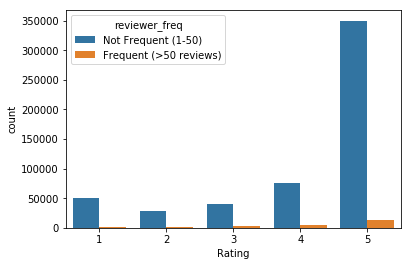

In [70]:
x = new_DF.UserId.value_counts()
x.to_dict()
new_DF["reviewer_freq"] = new_DF["UserId"].apply(lambda counts: "Frequent (>50 reviews)" \
                                                                 if x[counts]>50 else "Not Frequent (1-50)")
ax = sns.countplot(x='Score', hue='reviewer_freq', data=new_DF)
ax.set_xlabel('Rating')
plt.show()

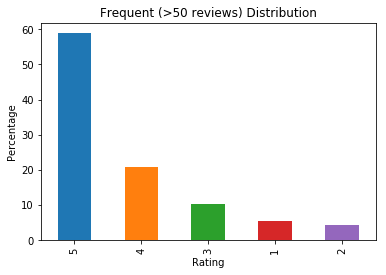

In [71]:
y = new_DF[new_DF.reviewer_freq=="Frequent (>50 reviews)"].Score.value_counts()
z = new_DF[new_DF.reviewer_freq=="Not Frequent (1-50)"].Score.value_counts()

tot_y = y.sum()

y = (y/tot_y)*100

tot_z = z.sum()

z = (z/tot_z)*100

y.plot(kind="bar")
plt.xlabel("Rating")
plt.ylabel("Percentage")
plt.title("Frequent (>50 reviews) Distribution")
plt.show()

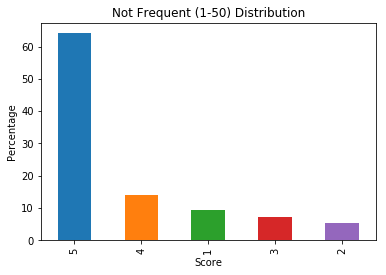

In [73]:
z.plot(kind="bar")
plt.xlabel("Score")
plt.ylabel("Percentage")
plt.title("Not Frequent (1-50) Distribution")
plt.show()

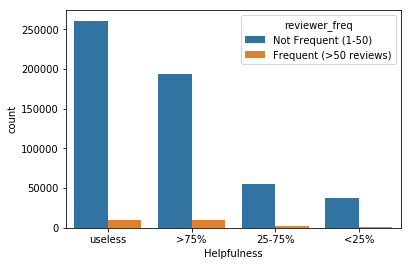

In [74]:
sns.countplot(x='Usefulness', order=['useless', '>75%', '25-75%', '<25%'], \
              hue='reviewer_freq', data=new_DF)
plt.xlabel('Helpfulness')
plt.show()

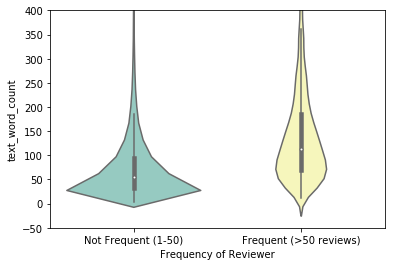

In [75]:
sns.violinplot(x='reviewer_freq', y='text_word_count',  \
               data=new_DF, palette='Set3')
plt.xlabel('Frequency of Reviewer')
plt.ylim(-50, 400)
plt.show()

### Что можно заметить после анализа данных 

- Много пропущенных значений в колонках "Summary" and "ProfileName"
- Датасет несбалансированный, так как отзывов с рейтингом 4/5 примерно 75 %
- Положительные отзывы 
    - короче
    - их находят более полезными
- Рецензенты с частыми отзывами
    - пишут отзывы длиннее
    - их отзывы считаются более полезными

### Подготовим данные для построения рекомендаций

In [21]:
df = pd.read_csv('Reviews.csv')

In [22]:
def data_clean(df, feature, m):
    count = df[feature].value_counts()
    df = df[df[feature].isin(count[count > m].index)]
    return df

In [23]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import numpy as np

df['datetime'] = pd.to_datetime(df.Time, unit='s')

features = ['ProductId', 'UserId']
m = 8
#Пользователей и предметы с менее чем 8 оценками не берем
def data_raw(df, features, m):
    fil = df.ProductId.value_counts()
    fil2 = df.UserId.value_counts()
    df['#Proudcts'] = df.ProductId.apply(lambda x: fil[x])
    df['#Users'] = df.UserId.apply(lambda x: fil2[x])
    while (df.ProductId.value_counts(ascending=True)[0]) < m \
        or (df.UserId.value_counts(ascending=True)[0] < m):
        df = data_clean(df, features[0], m)
        df = data_clean(df, features[1], m)
    return df
        
raw_data = data_raw(df, features, m)
raw_data['uid'] = pd.factorize(raw_data['UserId'])[0]
raw_data['pid'] = pd.factorize(raw_data['ProductId'])[0]

In [24]:
#Введем шкалирование признаков
sc = MinMaxScaler()
raw_data['time'] = sc.fit_transform(raw_data['Time'].values.reshape(-1,1))
raw_data['nuser'] = sc.fit_transform(raw_data['#Users'].values.reshape(-1,1))
raw_data['nproduct'] = sc.fit_transform(raw_data['#Proudcts'].values.reshape(-1,1))

#Разделим данные на 3 группы
X1 = raw_data.loc[:,['uid','pid']]
X2 = raw_data.loc[:,['uid','pid','time']]
X3 = raw_data.loc[:,['uid','pid','time','nuser','nproduct']]
y = raw_data.Score

#Заранее сделаем train_test_split
X1_train, X1_test, y_train, y_test = train_test_split(X1, y, test_size=0.3, random_state=42)
X2_train, X2_test, y_train, y_test = train_test_split(X2, y, test_size=0.3, random_state=42)
X3_train, X3_test, y_train, y_test = train_test_split(X3, y, test_size=0.3, random_state=42)

#Общие train и test
#User, product, score in line
train = np.array(X1_train.join(y_train))
test = np.array(X1_test.join(y_test))

#productId -> pid index
pid2PID = raw_data.ProductId.unique()
data_mixed = X1.join(y)
total_p = data_mixed['pid'].unique().shape[0]
total_u = data_mixed['uid'].unique().shape[0]

#Сделаем user-item таблицу
table = np.zeros([total_u,total_p])
z = np.array(data_mixed)
for line in z:
    u,p,s = line
    if table[u][p] < s:
        table[u][p] = s

D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [25]:
df.shape

(568454, 13)

In [26]:
raw_data.shape

(89282, 18)

### Метрики качества

Выбор был сделан в пользу MSE - средняя квадратичная ошибка.

In [27]:
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
def caculate_mse(x):
    MSE1 = []
    MSE2 = []
    for line in train:
        #User, product, score in line
        u,p,s = line 
        MSE1.append(s)
        MSE2.append(x[u,p])
    MSE_in_sample = mean_squared_error(MSE1, MSE2)
    MSE3 = []
    MSE4 = []
    for line in test:
        u,p,s = line
        MSE3.append(s)
        MSE4.append(x[u,p])
    MSE_out_sample = mean_squared_error(MSE3, MSE4)
    print('The train sample MSE = ' + str(MSE_in_sample))
    print('The test sample MSE = ' + str(MSE_out_sample))
    return MSE_in_sample, MSE_out_sample

Confusion matrix

<img src="cm.png">

In [33]:
import itertools
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

def draw_cm(y_pred, y_test = test, title=''):
    y1 = []
    y2 = []
    for line in y_test:
        u,p,s = line
        y1.append(s)
        y2.append(y_pred[u,p])
    temp1 = []
    temp2 = []
    for i in range(len(y1)):
        if np.array(y1)[i] >= 4:
            temp1.append(1)
        elif np.array(y1)[i] <= 2:
            temp1.append(0)
        else:
            temp1.append(0)
        if y2[i] >= 4:
            temp2.append(1)
        elif y2[i] <= 2:
            temp2.append(0)
        else:
            temp2.append(0)
    cm = confusion_matrix(temp1, temp2)
    plt.figure()
    plot_confusion_matrix(cm, classes=['not','recommand'], normalize=True,
                          title=title)
    plt.show()

#### Предсказание

In [53]:
def rec(result, uid, n, rawId= False):
    if uid in range(total_u):
        top_N = np.argpartition(result[uid],-n)[-n:]
        print('the top{} recommanded products for user {} is {}'.format(n,uid,top_N))
        if rawId == True:
            print('the real ID is {}'.format(pid2PID[top_N]))
    else:
        print('this user has not bought anything, plz use other methods')
    return top_N

## Matrix factorization

Latent factor models are an alternative approach that tries to explain the ratings by characterizing both items and users on, say, 20 to 100 factors inferred from the ratings patterns. For products, the discovered factors might measure obvious dimensions such as candy vs drinks, or adult food vs children’s; For users, each factor measures how much the user likes the product that score high on the corresponding movie factor. Using latent factor model, we transform the way to calculate the similarity of users and products. The features become more stable and condense.

we first create two new metrics, user-latent_factor and product-latent_factor. The size are qf and pf, p, q are the total number of users and products, f is the number of latent factors. So, every element in the target matrix can be calculate as: And the target matrix is shown as . Next, we need to create the objective function based on least-square method to minimize the loss
<img src="matrix_factorization.png">

The system adjusts the model by fitting the previously observed ratings. However, the goal is to generalize those previous ratings in a way that predicts the unknown ratings. Thus, the system should avoid overfitting the observed data by regularizing the learned parameters by adding L2 term. The constant λ controls the extent of regularization and is usually determined by cross-validation. Next, we use stochastic gradient descent to optimize the objective function. The processing is:

<img src="46ftTCS.png">

Where gamma is the stochastic learning rate and e is the error term. In the iteration, when the change in loss is larger than 0, the learning rate increases by 5%; if delta-loss is smaller than 0, it means the new loss is becoming larger. The learning rate decreases by 50% so that the loss can converge.

In [54]:
def MF (data=z, factors=30, maxIter=100, LRate=0.02, GD_end=1e-3, plot=False):
    # latent matrix for user
    U = np.random.rand(total_u, factors) / 3
    # latent matrix for item
    I = np.random.rand(total_p, factors) / 3
    # initial y as the history of loss
    y = []
    # initial the iteration and last loss
    iteration = 0
    last_loss = 0
    while iteration < maxIter:
        loss = 0
        for i in range(data.shape[0]):
            # get the uid, pid and the score from every line
            u, p, s = data[i]
            # calculate the error
            error = s - np.dot(U[u], I[p])
            # calculate the loss function
            # avoid loss become to large, scale to 1/50
            loss += error ** 2 / 50
            # update the parameter according to the gradient descent
            pp = U[u]
            qq = I[p]
            U[u] += LRate * error * qq
            I[p] += LRate * error * pp
        iteration += 1
        y.append(loss)
        delta_loss = last_loss - loss
        print('iter = {}, loss = {}, delta_loss = {}, LR = {}'.format(iteration, loss, delta_loss, LRate))
        # update the learn rate to make sure it will converge
        if abs(last_loss) > abs(loss):
            LRate *= 1.05
        else:
            LRate *= 0.5
        # When converge, stop the gradient descend
        if abs(delta_loss) < abs(GD_end):
            print('the diff in loss is {}, so the GD stops'.format(delta_loss))
            break
        last_loss = loss
    if plot:
        plt.title('Loss')
        plt.xlabel('Iteration')
        plt.plot(y)
        plt.show()
    return U.dot(I.T)

iter = 1, loss = 4669.806030104905, delta_loss = -4669.806030104905, LR = 0.02
iter = 2, loss = 1347.9209693153746, delta_loss = 3321.885060789531, LR = 0.01
iter = 3, loss = 864.3368388770251, delta_loss = 483.58413043834946, LR = 0.0105
iter = 4, loss = 774.492717718356, delta_loss = 89.84412115866917, LR = 0.011025000000000002
iter = 5, loss = 714.5775849599676, delta_loss = 59.91513275838838, LR = 0.011576250000000003
iter = 6, loss = 659.3127305907992, delta_loss = 55.26485436916835, LR = 0.012155062500000004
iter = 7, loss = 602.359204357565, delta_loss = 56.95352623323424, LR = 0.012762815625000005
iter = 8, loss = 543.8982167061924, delta_loss = 58.460987651372534, LR = 0.013400956406250006
iter = 9, loss = 486.02069242509486, delta_loss = 57.87752428109758, LR = 0.014071004226562506
iter = 10, loss = 430.269378764608, delta_loss = 55.75131366048686, LR = 0.014774554437890632
iter = 11, loss = 377.69519816452123, delta_loss = 52.57418060008678, LR = 0.015513282159785164
iter = 

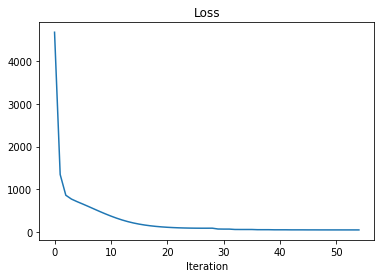

The train sample MSE = 0.030960974737980696
The test sample MSE = 0.029652022565967
Normalized confusion matrix
[[0.9884127  0.0115873 ]
 [0.12872834 0.87127166]]


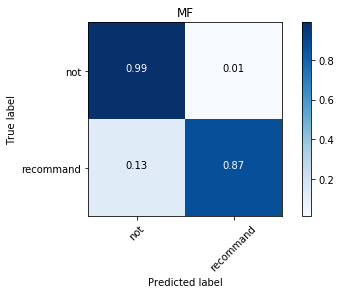

In [55]:
result = MF(factors=30, maxIter=100, LRate=0.02, GD_end=1e-3, plot=True)
caculate_mse(result)
draw_cm(result, title='MF')

In [56]:
rec(result, 10, 10, rawId=True)

the top10 recommanded products for user 10 is [ 665 1234  494  945  837  415  515  487  934 1047]
the real ID is ['B00125ZCWI' 'B001E18K8S' 'B001E0TBA0' 'B000WVYB8Y' 'B000OQ2DL4'
 'B0019QT66I' 'B000OQ2DJQ' 'B002LN1ME2' 'B003SSWCJI' 'B000WVY4PE']


array([ 665, 1234,  494,  945,  837,  415,  515,  487,  934, 1047],
      dtype=int64)

## Probabilistic Matrix Factorization

<img src="1.png">
PMF is similar to MF. It is nothing more than a MF assuming the distribution of user and production are Gaussian. That is:
<img src="2.png">
And the joint distribution of user and product is the distribution of the scores.
<img src="3.png">
The problem comes to maximum the probability of U, V based on R and variance. This transformation is based on Bayesian formula. Rewrite the function above and applying log to both sides:
<img src="4.png">
When optimizing this function, the standard errors are fixed, so the objective function is:
<img src="5.png">
Gradient descent process is the same with basic MF. PMF does better than MF for sparse matrices. The assumption of Gaussian makes it more accurate to predict. But for our dataset, the chosen data is not sparse, so the performance of PMF is almost the same with MF.

In [57]:
def PMF(data=z, factors=30, maxIter=100, LRate=0.02, GD_end=1e-3, regU = 0.01, regI = 0.01, plot=False):
    U = np.random.rand(total_u, factors) / 3
    I = np.random.rand(total_p, factors) / 3
    y = []
    iteration = 0
    last_loss = 100
    while iteration < maxIter:
        loss = 0
        for i in range(data.shape[0]):
            u, p, s = data[i]
            error = s - np.dot(U[u], I[p])
            loss += error ** 2/50
            pp = U[u]
            qq = I[p]
            U[u] += LRate *  (error * qq - regU * pp)
            I[p] += LRate * (error * pp - regI * qq)
        loss += regU * (U * U).sum() + regI * (I * I).sum()
        iteration += 1
        y.append(loss)
        delta_loss = last_loss - loss
        print('iter = {}, loss = {}, delta_loss = {}, LR = {}'.format(iteration, loss, delta_loss, LRate))
        if abs(last_loss) > abs(loss):
            LRate *= 1.05
        else:
            LRate *= 0.5

        if abs(delta_loss) < abs(GD_end):
            print('the diff in loss is {}, so the GD stops'.format(delta_loss))
            break
        last_loss = loss
    if plot:
        plt.title('Loss')
        plt.xlabel('Iteration')
        plt.plot(y)
        plt.show()
    return U.dot(I.T)

iter = 1, loss = 4970.249264994425, delta_loss = -4870.249264994425, LR = 0.02
iter = 2, loss = 1569.9335465508634, delta_loss = 3400.3157184435618, LR = 0.01
iter = 3, loss = 1109.4235323054806, delta_loss = 460.51001424538276, LR = 0.0105
iter = 4, loss = 1026.1375696453701, delta_loss = 83.2859626601105, LR = 0.011025000000000002
iter = 5, loss = 973.3484504586376, delta_loss = 52.78911918673259, LR = 0.011576250000000003
iter = 6, loss = 926.0481991761454, delta_loss = 47.30025128249213, LR = 0.012155062500000004
iter = 7, loss = 877.098128920789, delta_loss = 48.95007025535642, LR = 0.012762815625000005
iter = 8, loss = 825.7279371402594, delta_loss = 51.37019178052958, LR = 0.013400956406250006
iter = 9, loss = 773.988938146287, delta_loss = 51.73899899397247, LR = 0.014071004226562506
iter = 10, loss = 723.8389804698288, delta_loss = 50.14995767645814, LR = 0.014774554437890632
iter = 11, loss = 676.4113536557682, delta_loss = 47.42762681406066, LR = 0.015513282159785164
iter = 

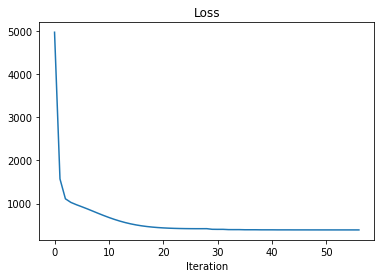

The train sample MSE = 0.03315542127809515
The test sample MSE = 0.031853759831069584
Normalized confusion matrix
[[0.98920635 0.01079365]
 [0.17373688 0.82626312]]


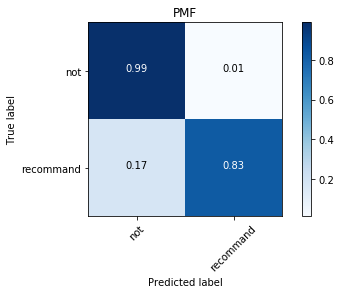

In [58]:
result = PMF(factors=30, maxIter=100, LRate=0.02, GD_end=1e-3, plot=True)
caculate_mse(result)
draw_cm(result, title='PMF')

In [59]:
rec(result, 10, 10, rawId=True)

the top10 recommanded products for user 10 is [1234  894  494 1047 1051  905  862  980  413  670]
the real ID is ['B001E18K8S' 'B000ED9L9E' 'B001E0TBA0' 'B000WVY4PE' 'B000H7ELTW'
 'B003GS3VQ8' 'B003GS5FMQ' 'B001GINOP8' 'B001GINOQC' 'B000H7LVKY']


array([1234,  894,  494, 1047, 1051,  905,  862,  980,  413,  670],
      dtype=int64)

## SVD

In our recommendation system, we have such a matrix which has many scores from the users to the items. We hope to predict the targeted users’ score to other unevaluated items and then recommend the items with the highest five scores. The advantage of SVD is that: users’ score matrix is a sparse matrix, so we can map the original data into a Low-dimensional space and then calculate the similarity of different items. This can help us reduce calculation complexity.
<img src="svd.png">

In [60]:
from numpy import *
from scipy.sparse.linalg import svds
from numpy import linalg as la
def svdrec(table = table, factors= 150):
    UI = matrix(table)
    user_ratings_mean = mean(UI,axis=0)
    user_ratings_mean = user_ratings_mean.reshape(1,-1)
    UI_demeaned = UI - user_ratings_mean
    U,sigma,Vt = svds(UI_demeaned,factors)
    sigma = diag(sigma)
    pred_mat = dot(dot(U,sigma),Vt) + user_ratings_mean
    sc = MinMaxScaler(feature_range = (1,5))
    pred_mat = sc.fit_transform(pred_mat)
    return pred_mat

The train sample MSE = 0.5291859053907854
The test sample MSE = 0.5244069641075166
Normalized confusion matrix
[[0.96       0.04      ]
 [0.17998536 0.82001464]]


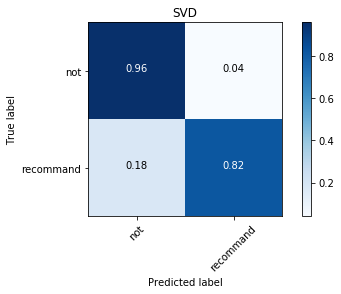

In [63]:
result1 = svdrec(factors=150)
caculate_mse(result1)
draw_cm(result1, title='SVD')

In [64]:
def rec(result, uid,n,rawId= False):
    if uid in range(total_u):
        # we take the first n people's highest score product
        top_N = np.argpartition(result[uid],-n)[-n:]
        print('the top{} recommanded products for user {} is {}'.format(n,uid,top_N))
        # if rawID is on, the out put contains the real product id
        if rawId == True:
            print('the real ID is {}'.format(pid2PID[top_N]))
    else:
        print('this user has not bought anything, plz use other methods')
    return top_N

In [65]:
rec(result1, 10, 10, rawId=True)

the top10 recommanded products for user 10 is [ 202    0  859 1235 1441 1446  294   66  142  596]
the real ID is ['B00472I5A4' 'B000G6RYNE' 'B0058AMYTC' 'B000G6O2QG' 'B004728MI4'
 'B001SAXPEO' 'B000LKXBL4' 'B0058AMY74' 'B0012XBD7I' 'B0058AMY10']


array([ 202,    0,  859, 1235, 1441, 1446,  294,   66,  142,  596],
      dtype=int64)

## Random Forest Regressor

At the very first, we try to use rfr to build a simple model. The idea is very easy, just use the algorithm find the latent score of one pair of user and item. We can see the MSE is not very high, and the confusion matrix is acceptable.
<img src="rf.jpg">
This part, the X are uid, pid,time, number of item and user. y is the score.

But the drawback is very obvious: the test MSE is 0.34 and and train MSE is 0.07 -- overfitting is quite a deal.

In [70]:
from sklearn.metrics import *
from sklearn.preprocessing import *
from sklearn.ensemble import *
def rf():
    # find X,and y
    raw_data['uid'] = pd.factorize(raw_data['UserId'])[0]
    raw_data['pid'] = pd.factorize(raw_data['ProductId'])[0]
    from sklearn.preprocessing import MinMaxScaler
    sc = MinMaxScaler()
    raw_data['time']=sc.fit_transform(raw_data['Time'].values.reshape(-1,1))
    raw_data['nuser']=sc.fit_transform(raw_data['#Users'].values.reshape(-1,1))
    raw_data['nproduct']=sc.fit_transform(raw_data['#Proudcts'].values.reshape(-1,1))

    X1 = raw_data.loc[:,['uid','pid']]
    X2 = raw_data.loc[:,['uid','pid','time']]
    X3 = raw_data.loc[:,['uid','pid','time','nuser','nproduct']]
    y = raw_data.Score

    from sklearn.model_selection import train_test_split
    X1_train,X1_test,y_train,y_test = train_test_split(X1,y,test_size=0.3,random_state=2017)
    X2_train,X2_test,y_train,y_test = train_test_split(X2,y,test_size=0.3,random_state=2017)
    X3_train,X3_test,y_train,y_test = train_test_split(X3,y,test_size=0.3,random_state=2017)
    a=RandomForestRegressor()
    a.fit(X3_train,y_train)
    y3 = a.predict(X3_test)
    sc = MinMaxScaler(feature_range=(1,5))
    c = mean_squared_error(y_train,a.predict(X3_train)), mean_squared_error(y_test,sc.fit_transform(y3.reshape(-1,1)))
    b = mean_squared_error(y_test,y3)
    print('train MSE is {}, test MSE is {}'.format(c,b))

    c3 = y3>=4
    t = y_test>=4
    print('accrucy of recommandation:')
    print(accuracy_score(t,c3))
    c31 = y3<=1
    t1 = y_test<=1
    print('accrucy of not recommandation:')
    print(accuracy_score(t1,c31))
    y_pred3 = []
    y_test3 = []
    for i in range(y3.shape[0]):
        if y3[i]>=4:
            y_pred3.append(1)
        elif y3[i]<4:
            y_pred3.append(0)
        # else:
            # y_pred3.append(1)

    for j in range(y3.shape[0]):
        if np.array(y_test)[j]>=4:
            y_test3.append(1)
        elif np.array(y_test)[j]<4:
            y_test3.append(0)
            
    import itertools
    import matplotlib.pyplot as plt
    def plot_confusion_matrix(cm, classes,
                              normalize=False,
                              title='Confusion matrix',
                              cmap=plt.cm.Blues):
        """
        This function prints and plots the confusion matrix.
        Normalization can be applied by setting `normalize=True`.
        """
        if normalize:
            cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
            print("Normalized confusion matrix")
        else:
            print('Confusion matrix, without normalization')

        print(cm)
        plt.imshow(cm, interpolation='nearest', cmap=cmap)
        plt.title(title)
        plt.colorbar()
        tick_marks = np.arange(len(classes))
        plt.xticks(tick_marks, classes, rotation=45)
        plt.yticks(tick_marks, classes)

        fmt = '.2f' if normalize else 'd'
        thresh = cm.max() / 2.
        for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
            plt.text(j, i, format(cm[i, j], fmt),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")

        plt.tight_layout()
        plt.ylabel('True label')
        plt.xlabel('Predicted label')
    class_names = ['not recommand','recommand']
    cnf_matrix = confusion_matrix(y_test3,y_pred3)
    np.set_printoptions(precision=2)
    plt.figure()
    plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                          title='rf')


    plt.show()
    return a

D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


train MSE is (0.06596504602147837, 0.31644578193831197), test MSE is 0.31644578193831197
accrucy of recommandation:
0.884263580362143
accrucy of not recommandation:
0.9783460892290461
Normalized confusion matrix
[[0.9  0.1 ]
 [0.12 0.88]]


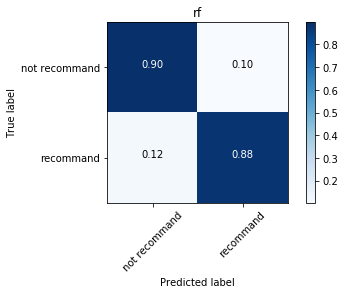

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [71]:
rf()